In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use('ggplot')
import pickle as pkl

from model_rl import RLEnvironment, RLAgent, QEstimator

2024-12-14 00:09:54.768254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Model Training

Don't rerun as it takes too long.

/var/folders/ln/80gw881d7y96pvkclfwfx0lh0000gn/T/ipykernel_3088/4142948327.py:37: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.returns = data.pct_change().dropna().values
/opt/anaconda3/envs/qf634/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Episode 1/55, episilon=1.0


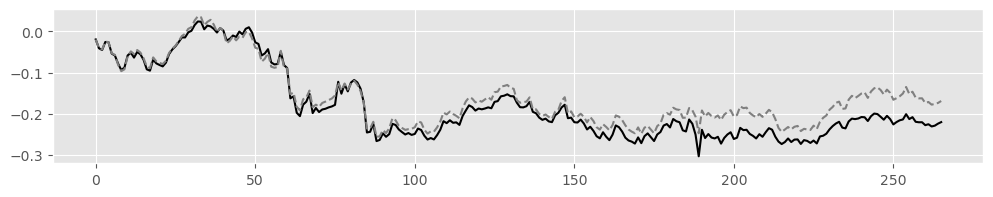


Episode 2/55, episilon=0.95

Episode 3/55, episilon=0.9025

Episode 4/55, episilon=0.8573749999999999

Episode 5/55, episilon=0.8145062499999999

Episode 6/55, episilon=0.7737809374999999


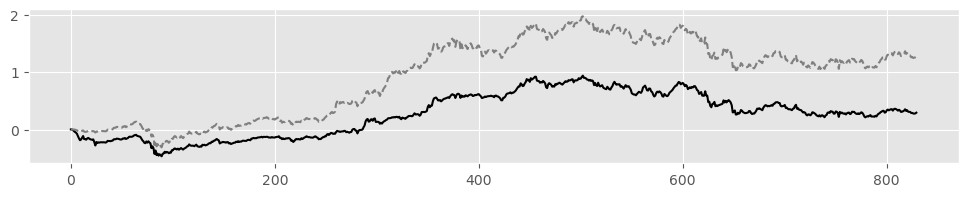


Episode 7/55, episilon=0.7350918906249998

Episode 8/55, episilon=0.6983372960937497

Episode 9/55, episilon=0.6634204312890623

Episode 10/55, episilon=0.6302494097246091

Episode 11/55, episilon=0.5987369392383786


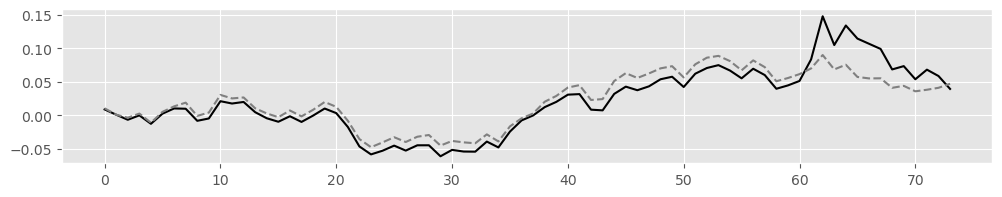


Episode 12/55, episilon=0.5688000922764596

Episode 13/55, episilon=0.5403600876626365

Episode 14/55, episilon=0.5133420832795047

Episode 15/55, episilon=0.48767497911552943

Episode 16/55, episilon=0.46329123015975293


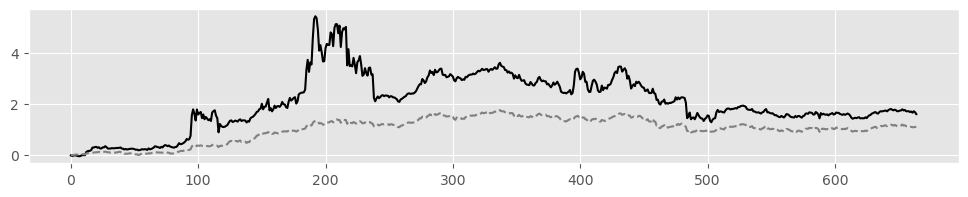


Episode 17/55, episilon=0.44012666865176525

Episode 18/55, episilon=0.41812033521917696

Episode 19/55, episilon=0.3972143184582181

Episode 20/55, episilon=0.37735360253530714

Episode 21/55, episilon=0.35848592240854177


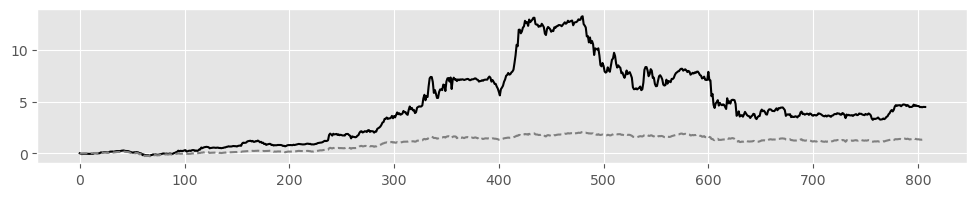


Episode 22/55, episilon=0.34056162628811465

Episode 23/55, episilon=0.3235335449737089

Episode 24/55, episilon=0.30735686772502346

Episode 25/55, episilon=0.2919890243387723

Episode 26/55, episilon=0.27738957312183365


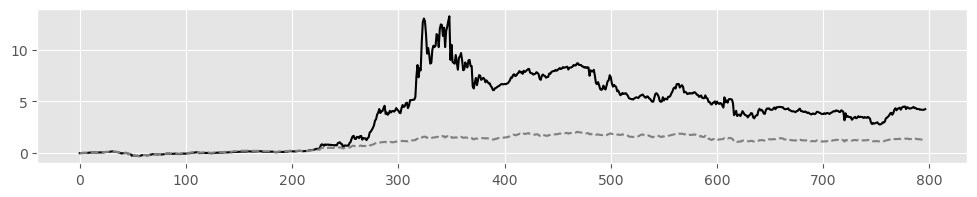


Episode 27/55, episilon=0.263520094465742

Episode 28/55, episilon=0.25034408974245487

Episode 29/55, episilon=0.2378268852553321

Episode 30/55, episilon=0.2259355409925655

Episode 31/55, episilon=0.2146387639429372


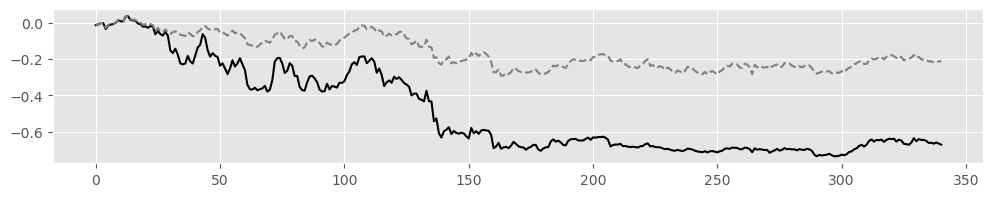


Episode 32/55, episilon=0.20390682574579033

Episode 33/55, episilon=0.1937114844585008

Episode 34/55, episilon=0.18402591023557577

Episode 35/55, episilon=0.17482461472379698

Episode 36/55, episilon=0.16608338398760714


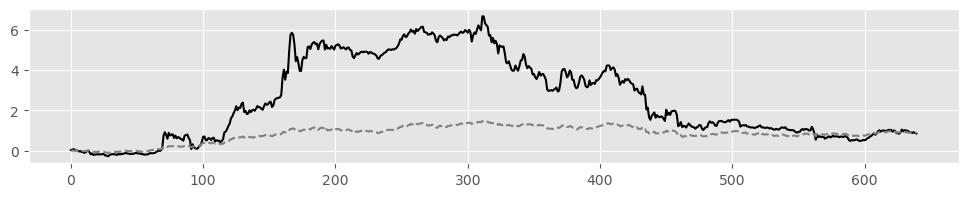


Episode 37/55, episilon=0.15777921478822676

Episode 38/55, episilon=0.14989025404881542

Episode 39/55, episilon=0.14239574134637464

Episode 40/55, episilon=0.1352759542790559

Episode 41/55, episilon=0.1285121565651031


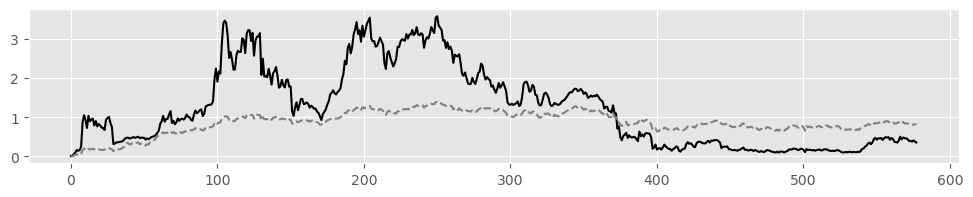


Episode 42/55, episilon=0.12208654873684793

Episode 43/55, episilon=0.11598222130000553

Episode 44/55, episilon=0.11018311023500525

Episode 45/55, episilon=0.10467395472325498

Episode 46/55, episilon=0.09944025698709223


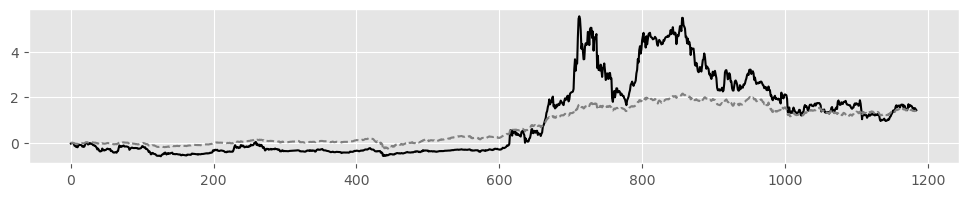


Episode 47/55, episilon=0.09446824413773762

Episode 48/55, episilon=0.08974483193085074

Episode 49/55, episilon=0.0852575903343082

Episode 50/55, episilon=0.08099471081759278

Episode 51/55, episilon=0.07694497527671314


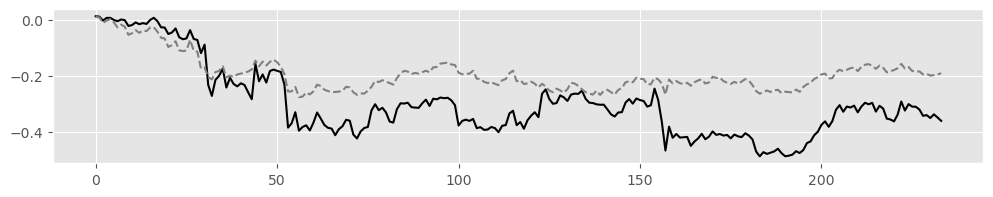


Episode 52/55, episilon=0.07309772651287748

Episode 53/55, episilon=0.0694428401872336

Episode 54/55, episilon=0.0659706981778719

Episode 55/55, episilon=0.0626721632689783


In [106]:
env_train = RLEnvironment(input_file='data/df_price_train.csv', 
                   observe_window = 90, 
                   rebalance_window = 30)

agent = RLAgent(n_action=61)

stats = agent.q_learn(env_train, 
                        n_episodes=55,
                        alpha=0.01,
                        epsilon=1.0,
                        epsilon_min=0.01,
                        epsilon_decay_rate=0.95,
                        gamma=0.95,
                        replay_batch_size=10)


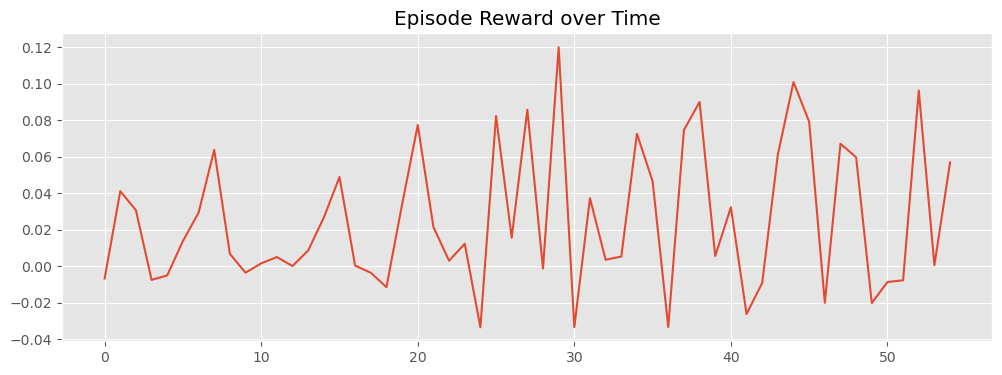

In [107]:
# check if Q converged
plt.figure(figsize = (12, 4))
plt.plot(stats.episode_rewards)
plt.title("Episode Reward over Time")

plt.show()

### Model Testing

/Users/admin/Desktop/qf634-quant-reasearch-methods/rl/model_rl.py:43: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.returns = data.pct_change().dropna().values


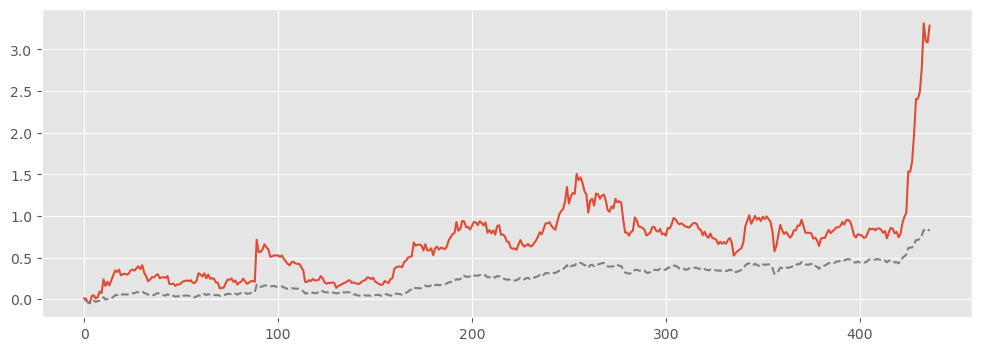

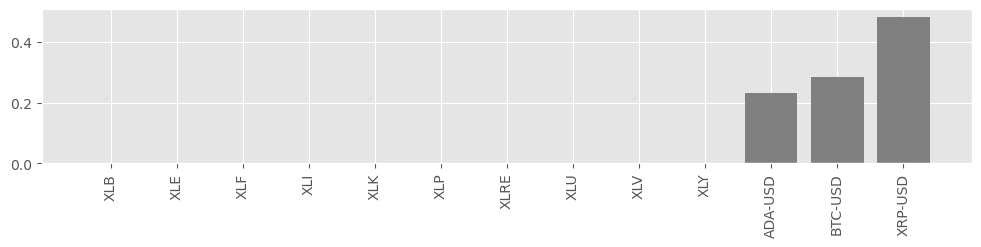

In [2]:
env_test = RLEnvironment(input_file="data/df_price_test.csv", 
                        observe_window = 90, 
                        rebalance_window = 30)

agent = RLAgent(n_action=61)
agent.load_model("model/q_estimator_final_v2_0_retsum.pkl")

performance = agent.q_predict(env_test) # contains: portfolio_returns, benchmark_returns, portfolio_composition

plt.figure(figsize = (12, 2))
for compo in performance.portfolio_composition:    
    plt.bar(np.arange(env_test.n_asset), compo, color = 'grey', alpha = 0.25)
    plt.xticks(np.arange(env_test.n_asset), env_test.asset_names, rotation='vertical')
plt.show()